## 1. Introduction

### Packaes used

In [ ]:
import numpy as np
import pandas as pd
import scipy
pd.set_option('display.max_columns', None)
%matplotlib inline

import re

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests
import csv

## 2. Dataset
- totally three different type of datset
    - a. FIFA2022(game) dataset from the game in beginning of 2022(This dataset is based on the results from 2021)
    - b. League table of 5 best leagues in Europe 2021
    - c. FIFA world ranking by nation

### 2.a. Crawling the FIFA2022(game) datset from www.sofifa.com
- we only extract the columns that we need
- and save it as csv file with appropriate column names

In [41]:
# f = open('fifa2022.csv','w', newline='')
# wr = csv.writer(f)

# wr.writerow(['Id','Name','Age','Nationality','Team','Height','Weight',
#              'Overall','Potential','Best position','Value','Wage',
#              'International Reputation'])

# for offset in range(0,319):
#     url = 'https://sofifa.com/players?type=all&r=220001&set=true&showCol%5B%5D=pi&showCol%5B%5D=ae&showCol%5B%5D=hi&showCol%5B%5D=wi&showCol%5B%5D=pf&showCol%5B%5D=oa&showCol%5B%5D=pt&showCol%5B%5D=bo&showCol%5B%5D=bp&showCol%5B%5D=gu&showCol%5B%5D=jt&showCol%5B%5D=le&showCol%5B%5D=vl&showCol%5B%5D=wg&showCol%5B%5D=tt&showCol%5B%5D=bs&showCol%5B%5D=ir&offset='
#     url += str(offset*60) 
    
#     webpage = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
#     soup = BeautifulSoup(webpage.text,'html.parser')
#     trs = soup.select('tbody>tr')
#     for tr in trs:
#         player_id = tr.select('td.col-pi')[0].text
#         name = tr.select('.ellipsis')[0].text
#         team = tr.select('td.col-name')[1].select('a')[0].text
#         contract = tr.select('td.col-name')[1].select('.sub')[0].text
#         nationality = tr.select('td.col-name > img')[0]['title']
#         age = tr.select('td.col.col-ae')[0].text
#         height = tr.select('td.col.col-hi')[0].text
#         weight = tr.select('td.col.col-wi')[0].text
#         ova = tr.select('td.col.col-oa')[0].text
#         potential = tr.select('td.col.col-pt')[0].text
#         best_position = tr.select('td.col.col-bp')[0].text
#         value = tr.select('td.col.col-vl')[0].text
#         wage = tr.select('td.col.col-wg')[0].text
#         international_ranking = tr.select('td.col.col-ir')[0].text
#         wr.writerow([player_id,name,age,nationality,team,height,
#                     weight,ova,potential,best_position,
#                     value,wage,international_ranking])
# f.close()

In [84]:
# load datset fifa.csv
fifa = pd.read_csv('fifa2022.csv')

# display first 5 of fifa datset
fifa.head()

,Id,Name,Age,Nationality,Team,Height,Weight,Overall,Potential,Best position,Value,Wage,International Reputation
0,158023,L. Messi,34,Argentina,Paris Saint-Germain,170cm,72kg,93,93,RW,€78M,€320K,5
1,188545,R. Lewandowski,32,Poland,FC Bayern München,185cm,81kg,92,92,ST,€119.5M,€270K,5
2,231747,K. Mbappé,22,France,Paris Saint-Germain,182cm,73kg,91,95,ST,€194M,€230K,4
3,200389,J. Oblak,28,Slovenia,Atlético de Madrid,188cm,87kg,91,93,GK,€112M,€130K,5
4,192985,K. De Bruyne,30,Belgium,Manchester City,181cm,70kg,91,91,CM,€125.5M,€350K,4


### 2.b. Downloading league table of 5 best leagues in Europe 2021 from www.sofifa.com
- used read_html
- just extract rename some columns because all of the dataset except the 'Team name' is integer


In [28]:
url_list = {'Germany':'https://sofifa.com/team/21/fc-bayern-munchen/live?r=210064&set=true',
            'England':'https://sofifa.com/team/1/arsenal/live?r=210064&set=true',
            'Spain':'https://sofifa.com/team/241/fc-barcelona/live?r=210064&set=true',
            'Italy':'https://sofifa.com/team/47/ac-milan/live?r=210064&set=true',
            'France':'https://sofifa.com/team/73/paris-saint-germain/live?r=210064&set=true'}

league_table = {}

for league,url in url_list.items():
    print(url)
    webpage = requests.get(url, headers={'User-Agent':'Chrome/66.0.3359.181'})
    tables = pd.read_html(webpage.content,encoding='UTF-8')
    league_table[league] = tables[0]
    
def extract_and_rename_column(x):
    table = x.droplevel(level=0,axis=1)
    table.columns = range(table.columns.size)
    table = table[[0,2,3,4,6,7,8,9,10,11]]
    table.columns = ['Rank','Team','Points','GD','Match','Win','Draw','Loss','GF','GA']
    return table

for country,table in league_table.items():
    league_table[country] = extract_and_rename_column(table)

https://sofifa.com/team/21/fc-bayern-munchen/live?r=210064&set=true
https://sofifa.com/team/1/arsenal/live?r=210064&set=true
https://sofifa.com/team/241/fc-barcelona/live?r=210064&set=true
https://sofifa.com/team/47/ac-milan/live?r=210064&set=true
https://sofifa.com/team/73/paris-saint-germain/live?r=210064&set=true


In [29]:
# display league table
display(league_table['Germany'].head())
league_table['Germany'].info()

,Rank,Team,Points,GD,Match,Win,Draw,Loss,GF,GA
0,1,FC Bayern München,78,55,34,24,6,4,99,44
1,2,RB Leipzig,65,28,34,19,8,7,60,32
2,3,Borussia Dortmund,64,29,34,20,4,10,75,46
3,4,VfL Wolfsburg,61,24,34,17,10,7,61,37
4,5,Eintracht Frankfurt,60,16,34,16,12,6,69,53


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    18 non-null     int64 
 1   Team    18 non-null     object
 2   Points  18 non-null     int64 
 3   GD      18 non-null     int64 
 4   Match   18 non-null     int64 
 5   Win     18 non-null     int64 
 6   Draw    18 non-null     int64 
 7   Loss    18 non-null     int64 
 8   GF      18 non-null     int64 
 9   GA      18 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.5+ KB


### 2.c. Downloading FIFA nation ranking dataset from www.football-ranking.com 
- used read_html
- only need two columns indicating ranking and name of the nation
- rename column names

In [22]:
tables = pd.read_html('http://www.football-rankings.info/2021/09/fifa-ranking-september-2021-final.html')
fifa_ranking = tables[1].drop(0)[[0,1]]
fifa_ranking.columns = ['Rank','Nationality']
fifa_ranking['Rank'] = fifa_ranking['Rank'].astype(float)

In [100]:
# display FIFA nation ranking 
display(fifa_ranking.head())
fifa_ranking.info()

,Rank,Nationality
1,1.0,Belgium
2,2.0,Brazil
3,3.0,England
4,4.0,France
5,5.0,Italy


<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 1 to 210
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         210 non-null    float64
 1   Nationality  210 non-null    object 
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


## 3. Preprocessing FIFA2022 dataset
- Two other datset,League table of Best 5 European League and FIFA nation ranking, needs no more preprocessing

### 3.a. NA values
- There are few players who did not succefully make a contract when the FIFA2022 was released

In [85]:
# check missing data
fifa.isna().sum()

Id                           0
Name                         0
Age                          0
Nationality                  0
Team                        78
Height                       0
Weight                       0
Overall                      0
Potential                    0
Best position                0
Value                        0
Wage                         0
International Reputation     0
dtype: int64

In [86]:
fifa[fifa['Team'].isna()]

,Id,Name,Age,Nationality,Team,Height,Weight,Overall,Potential,Best position,Value,Wage,International Reputation
191,184087,T. Alderweireld,32,Belgium,NaN,186cm,81kg,83,83,CB,€0,€0,3
482,197242,G. Krychowiak,31,Poland,NaN,187cm,84kg,80,80,CDM,€0,€0,3
832,187607,A. Dzyuba,32,Russia,NaN,196cm,91kg,78,78,ST,€0,€0,2
1076,200094,M. Ozdoev,28,Russia,NaN,184cm,78kg,77,78,CDM,€0,€0,1
1282,222404,M. Normann,25,Norway,NaN,179cm,75kg,76,82,CDM,€0,€0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16561,263316,C. Chatzigavriel,17,Cyprus,NaN,185cm,80kg,58,84,GK,€0,€0,1
17081,262563,M. Kokkinoftas,18,Cyprus,NaN,179cm,73kg,57,70,CB,€0,€0,1
17711,263251,N. Dimitriou,19,Cyprus,NaN,176cm,69kg,55,69,RM,€0,€0,1
17897,263388,P. Polykarpou,20,Cyprus,NaN,182cm,74kg,55,69,CB,€0,€0,1


In [87]:
# remove the records that include missing dataset
fifa.dropna(axis=0,inplace=True)
fifa.isna().sum()

Id                          0
Name                        0
Age                         0
Nationality                 0
Team                        0
Height                      0
Weight                      0
Overall                     0
Potential                   0
Best position               0
Value                       0
Wage                        0
International Reputation    0
dtype: int64

### 3.b. Height and  Weight columns
- Height and Weight column are in String format with its own unit

In [88]:
display(fifa[['Height','Weight']].head())
fifa[['Height','Weight']].info()

,Height,Weight
0,170cm,72kg
1,185cm,81kg
2,182cm,73kg
3,188cm,87kg
4,181cm,70kg


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19020 entries, 0 to 19097
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Height  19020 non-null  object
 1   Weight  19020 non-null  object
dtypes: object(2)
memory usage: 445.8+ KB


In [89]:
# Height
# get rid of unit string with 'str.replace'
# And change type into int
fifa['Height'] = fifa['Height'].str.replace('cm','').astype(int)

# To clearly show the data, change the column name to Height(cm)
fifa['Height(cm)'] = fifa['Height']
fifa.drop(columns=['Height'],inplace=True)
fifa[['Height(cm)']].head()

,Height(cm)
0,170
1,185
2,182
3,188
4,181


In [90]:
# weight
# get rid of unit string with 'str.replace'
# And change type into int
fifa['Weight'] = fifa['Weight'].str.replace('kg','').astype(int)

# To clearly show the data, change the column name to Weight(kg)
fifa['Weight(kg)'] = fifa['Weight']
fifa.drop(columns=['Weight'],inplace=True)
fifa[['Weight(kg)']].head()

,Weight(kg)
0,72
1,81
2,73
3,87
4,70


### 3.c. Value and Wage columns
- Value and Wage columns are in string format with its own currency and unit
- Unit is not uniform; some values with unit 'M', some values with unit 'K', some values with no unit
- M means million
- K means thousand

In [91]:
display(fifa[['Value','Wage']].head())
display(fifa[['Value']].tail())
fifa[['Value',Wage]].info()

0       €78M
1    €119.5M
2      €194M
3      €112M
4    €125.5M
Name: Value, dtype: object

19093    €110K
19094    €110K
19095     €90K
19096    €110K
19097    €100K
Name: Value, dtype: object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19020 entries, 0 to 19097
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Value   19020 non-null  object
dtypes: object(1)
memory usage: 297.2+ KB


In [92]:
# Value 
# It is possible to extract string without currency using 'str.extract' and regular expression
# And using 'apply' function, we apply function 'calc_value' to extracted string without currency
# 'calc_value' can calculate the value(float) by unit behind it from the string input.
# For example, if 100M is input, the function returns 100*1,000,000

def calc_value(x):
    if x[-1] == 'M':
        return float(x[:-1])*1000000
    elif x[-1] =='K':
        return float(x[:-1])*1000
    else:
        return float(x)
    
fifa['Value'] = fifa['Value'].str.extract(r'(\d+\.?\d?K?M?)')[0].apply(calc_value)
display(fifa[['Value']].head())

,Value
0,78000000.0
1,119500000.0
2,194000000.0
3,112000000.0
4,125500000.0
...,...
19093,110000.0
19094,110000.0
19095,90000.0
19096,110000.0


In [93]:
# Wage
# Followed excatly same procedure as above for 'Value' column
def calc_wage(x):
    if x[-1] == 'K':
        return float(x[:-1])*1000
    else:
        return float(x)
fifa['Wage'] = fifa['Wage'].str.extract(r'(\d+\.?\d?K?)')[0].apply(calc_wage)
fifa[['Wage']].head()

,Wage
0,320000.0
1,270000.0
2,230000.0
3,130000.0
4,350000.0


### 3.d Add League column to FIFA2022
- In the original dataset FIFA2022, there is no column indicating which league the player is in
- Add the column called 'League' using league table of 5 Best Leagues in Europe 2021
- The 'League' column will be categorized by name of the country
- If the player is not in 5 best European leagues, it will be assigned 'Else'

In [97]:
# Using 'apply' funtion, we apply 'find_leauge' function to column called 'Team'
# 'find_league' function returns country of the League if the team exist in each league table
# If the team does not exist in either of the league tables, the function return 'Else'

def find_league(x):
    if x in league_table['Germany']['Team'].to_list():
        return 'Germany'
    elif x in league_table['England']['Team'].to_list():
        return 'England'
    elif x in league_table['France']['Team'].to_list():
        return 'France'
    elif x in league_table['Spain']['Team'].to_list():
        return 'Spain'
    elif x in league_table['Italy']['Team'].to_list():
        return 'Italy'
    else: 
        return 'Else'

# add league column    
fifa['League'] = fifa['Team'].apply(find_league)
display(fifa[['Team','League']])

,Team,League
0,Paris Saint-Germain,France
1,FC Bayern München,Germany
2,Paris Saint-Germain,France
3,Atlético de Madrid,Spain
4,Manchester City,England
...,...,...
19093,Derry City,Else
19094,Finn Harps,Else
19095,Chennaiyin FC,Else
19096,Finn Harps,Else


## 4. Visualization

## Result 1
- 각 리그에서 팀 순위와 팀 전체 overall 평균사이의 상관관계 
- 아래 그래프를 보면 5개 리그 모두 상관관계가 0.8 이상으로 강한 상관관계를 보여줌

## Result 1
- Correlation between each league table and average overall per team 
- As we can see from below, all 5 correlation is above 0.8 which is pretty strong enough to convince that there is correlation between league table and overall

SpearmanrResult(correlation=0.8555211558307534, pvalue=6.005632918162668e-06)
SpearmanrResult(correlation=0.8240601503759398, pvalue=7.946551309934546e-06)
SpearmanrResult(correlation=0.8180451127819548, pvalue=1.0505529225549313e-05)
SpearmanrResult(correlation=0.8679955484085836, pvalue=7.088814886383863e-07)
SpearmanrResult(correlation=0.8165413533834586, pvalue=1.1247209263971732e-05)


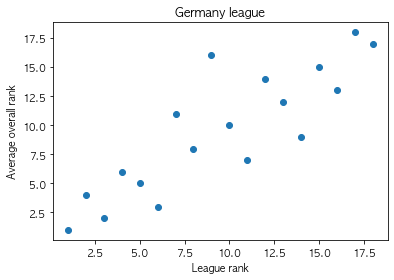

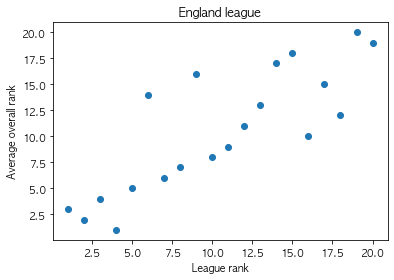

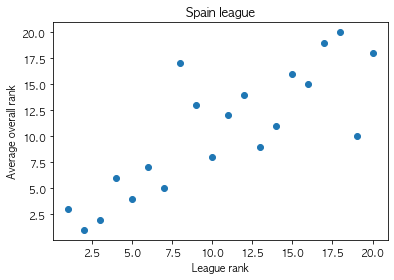

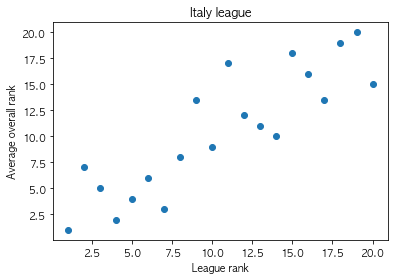

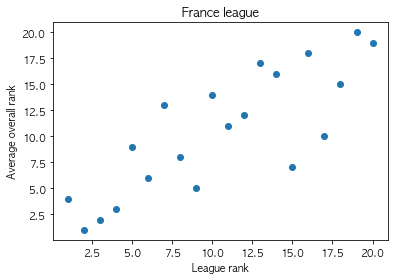

In [9]:
# rank correlation between average overall and each league table 
for country,table in league_table.items():
    data_fifa = fifa[fifa['League'] == country].groupby('Team')['Overall'].mean().sort_values(ascending=False).to_frame().reset_index()
    data_real = table
    result = pd.merge(data_fifa,data_real)
    result['Overall_Rank'] = result['Overall'].rank(ascending=False)
    plt.figure()
    plt.scatter(result['Rank'],result['Overall_Rank'],)
    plt.title(country+' league')
    plt.xlabel('League rank')
    plt.ylabel('Average overall rank')
    print(scipy.stats.spearmanr(result['Rank'],result['Overall_Rank']))

In [10]:
# download fifa ranking 
tables = pd.read_html('http://www.football-rankings.info/2021/09/fifa-ranking-september-2021-final.html')
fifa_ranking = tables[1].drop(0)[[0,1]]
fifa_ranking.drop(fifa_ranking[fifa_ranking[1] == 'USA'].index)
def check_team_name(x): 
    c = 0
    for name in fifa_ranking[1].values:
        result = (x['Nationality']==name).sum()
        if result==0:
            c+=1
            fifa_ranking.drop(fifa_ranking[fifa_ranking[1] == name].index,inplace=True)
    print(c)
            
check_team_name(fifa) 
fifa_ranking.columns = ['Rank','Nationality']
fifa_ranking['Rank'] = fifa_ranking['Rank'].astype(float)

54


## Result 2
- 피파 랭킹과 국가별 평균 overall의 상관관계
- 이때 정확한 피파 랭킹을 반영하기 위해 fifa에서 정해놓은 국가대표 선출 인원수를 참고함
- 소집되는 선수들은 23명이기때문에 23명 이상의 선수들이 존재하는 나라들만 데이터에서 추출함
- 아래 그래프를 보면 강한 상관관계를 보여줌

In [ ]:
def check_team_name(x): 
    c = 0
    for name in fifa_ranking[1].values:
        result = (x['Nationality']==name).sum()
        if result==0:
            c+=1
            fifa_ranking.drop(fifa_ranking[fifa_ranking[1] == name].index,inplace=True)
    print(c)

SpearmanrResult(correlation=0.867231385835737, pvalue=2.3340329535264678e-21)

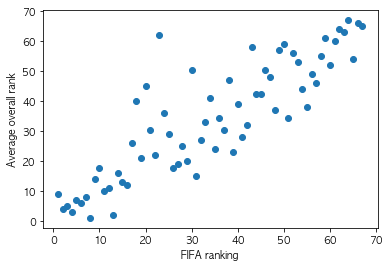

In [11]:
# rank correlation between fifa ranking and average overall 
a = fifa.groupby('Nationality').apply(lambda x:x['Overall'].sort_values(ascending=False)[0:23].mean() if x['Overall'].size>23 else 0).to_frame()
a = a.reset_index()
a.dropna(inplace=True)
a.columns = ['Nationality','Overall']

temp = pd.merge(a,fifa_ranking,how='inner')
temp = temp[temp['Overall']!=0]
temp['Rank'] = temp['Rank'].rank()
temp['Overall_Rank'] = temp['Overall'].rank(ascending=False)

import scipy

plt.scatter(temp['Rank'],temp['Overall_Rank'])
plt.xlabel('FIFA ranking')
plt.ylabel('Average overall rank')
scipy.stats.spearmanr(temp['Rank'],temp['Overall_Rank'])

## Result 1+2
- 위의 result01 과 result02를 통해 sofia에서 다운받은 fifa데이터의 overall 데이터는 상당히 현실성이 반영된 자료라고 할수있다 

## Result 3
- top n analysis
- 5대 리그 중에 팀 평균 overall이 높은순으로 정렬
- 상위 30개팀의 리그별 분포를 보면 스페인,잉글랜드 가 상당히 높은 비중을 차지함

<AxesSubplot:xlabel='League', ylabel='count'>

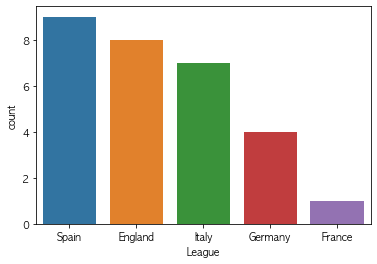

In [12]:
# top 30 highest average overall team distribution
# top n
import seaborn as sns
df = fifa[fifa['League']!='Else'].groupby('Team')['Overall'].mean().sort_values(ascending=False).to_frame().reset_index()
df['League']= df['Team'].apply(find_league)

sns.countplot(data = df[1:30],x='League',order=df[1:30]['League'].value_counts().index)

## Reulst 4
- 각 리그별 overall의 분포를 시각화함
- 아래 그래프를 보면 영국의 평균이 가장 높은(오른쪽)것을 확인할수 있음
- 스페인이 그 다음으로 평균이 높은것을 확인 가능
- 다만 실제 현실세계에서는 2군 선수를 비롯해 게임상의 추가되어있지 않은 더 큰 모집단이 있다고 가정하고 피파 게임 내에서의 데이터를 표본평균으로 본다면
- 스페인과 잉글랜드 두 리그간의 t test를 진행보면 크게 차이가 없는것을 확인할수 있다=> 두 리그 모두 우수함


In [13]:
fifa[fifa['League']!='Else'].groupby('League')['Overall'].mean()

League
England    73.007800
France     70.807229
Germany    71.742230
Italy      72.042088
Spain      73.086751
Name: Overall, dtype: float64

Ttest_indResult(statistic=2.2024718111827712, pvalue=0.013908264616499117)

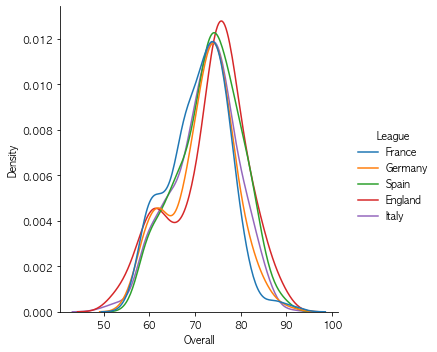

In [14]:
# distribution of overall by league
sns.displot(fifa[fifa['League']!='Else'],x='Overall',hue='League',kind='kde')


# 모집단이 존재한다는 가정
# t 검정
import scipy
scipy.stats.ttest_ind(fifa['Overall'][fifa['League']=='England'],fifa['Overall'][fifa['League']=='Spain'])

scipy.stats.ttest_ind(fifa['Overall'][fifa['League']=='England'],fifa['Overall'][fifa['League']=='Italy'],alternative='greater')

## Result 5
- result04에서는 단순히 각 팀의 평균 overall에 대해서 비교를 진행했는데
- 실제 축구는 단순히 공격 또는 수비에만 치중한다고 좋은 팀 이라고 할수가 없다
- 따라서 position에 따라 적절히 공격과 수비의 범주로 구분뒤 리그별 overall의 평균을 구했다
- 잉글랜드와 스페인 리그가 공수 모두 overall 평균이 높은 것을 확인 가능

,League,Offense-Defense,Overall
0,England,Defense,73.383978
1,England,Offense,72.519713
2,France,Defense,70.726415
3,France,Offense,70.904943
4,Germany,Defense,72.059406
5,Germany,Offense,71.348361
6,Italy,Defense,72.232704
7,Italy,Offense,71.822464
8,Spain,Defense,73.014085
9,Spain,Offense,73.179211


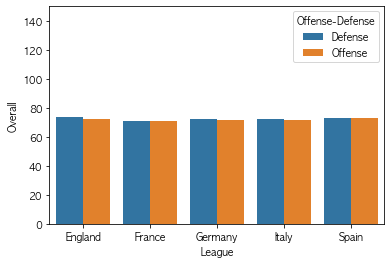

In [15]:
position_dic = {'Offense':['RW', 'ST','CM','LW','CF','CAM','RM'],'Defense':['GK','CB','CDM','RB','LB','RWB','LWB']}
def offense_defense(x):
    if x in position_dic['Offense']:
        return 'Offense'
    else: return 'Defense'
fifa['Offense-Defense'] = fifa['Best position'].apply(offense_defense)
data = fifa[fifa['League']!='Else'].groupby(['League','Offense-Defense'])['Overall'].mean().reset_index()
sns.barplot(data=data,x='League',y='Overall',hue='Offense-Defense')
plt.ylim(0,150)

display(data)

## Result 6
- 시장의 규모를 따진다면 잉글랜드 앞도적으로 선수들에게 지출이 크다

<AxesSubplot:xlabel='Wage', ylabel='League'>

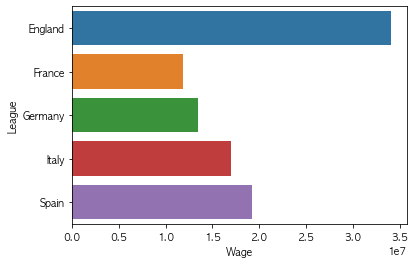

In [175]:
# 시장 규모
data = fifa[fifa['League']!='Else'].groupby('League')[['Wage']].sum().reset_index()

sns.barplot(data=data,x='Wage',y='League')

In [176]:
# data = fifa[fifa['League']!='Else'].groupby(['League','Team','Offense-Defense'])[['Overall']].mean()
# data = data.reset_index()
# plt.figure(figsize=(20,20))
# sns.barplot(data=data[data['League']=='England'],x='Team',y='Overall',hue='Offense-Defense')
# plt.show()

## Result 7(1)
- 아래 그래프는 각 리그별 23세 이하 선수들의 potential의 분포도를 보여준다
- 잉글랜드 리그의 평균이 가장 높고 그다음 스페인 순이다
- 다만 potential이라는 지표 자체가 굉장히 주관적이다(한계점), 선수의 미래를 예측 불가

#### 따라서 potential만으로는 얼마나 유망한 선수가 많고 이들을 육성하는데 투자하는지는 판단 불가능
#### Result 7(2) 와 Reuslt 7(3)으로 근거를 더 제시하자

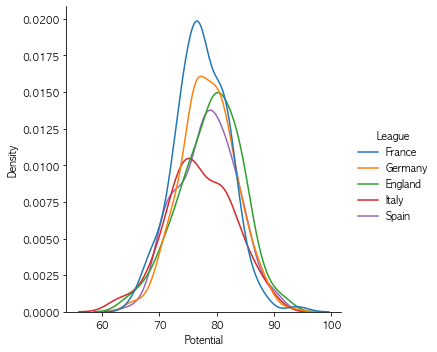

In [19]:
sns.displot(fifa[(fifa['League']!='Else')&(fifa['Young Player']=='Young')],x='Potential',hue='League',kind='kde')
plt.show()

## Result 7(2)
- 23세 이하 선수들에게 가장 많은 돈을 투자하는 리그는 압도적으로 영국이다
- 23세 이하 선수들이 평균 기량은 독일이 가장 높고 영국이 가장 낮다
- 왜 영국이 가장 낮을까? => Result07(2) 확인

In [18]:
fifa['Young Player'] = fifa['Age'].apply(lambda x: 'Young' if x<=23 else 'Old' )
display(fifa[(fifa['League']!='Else')&(fifa['Young Player']=='Young')].groupby(['League'])['Wage'].mean())
display(fifa[(fifa['League']!='Else')&(fifa['Young Player']=='Young')].groupby(['League'])['Overall'].mean())

League
England    25066.666667
France     12308.614865
Germany    14261.857708
Italy      14884.250000
Spain      15997.854077
Name: Wage, dtype: float64

League
England    66.860465
France     67.489865
Germany    67.699605
Italy      67.020000
Spain      67.519313
Name: Overall, dtype: float64

## Result 7(3)
- 아래 그래프는 23세이 이하 선수들의 리그별 나이 분포도를 보여준다
- 굉자이 특이한것은 잉글랜드 리그는 실질적으로 20세 이하 선수들의 비중이 앞도적으로 높다 => 나이가 굉장히 어린 선수들이 많기 때문에 overall 평균이 낮았던 거다
- 스페인 이탈리아 프랑스는 23세 비중이 가장 크다

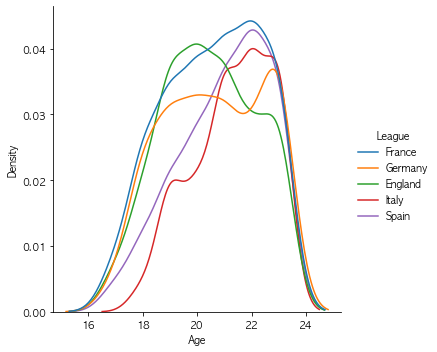

In [179]:
sns.displot(fifa[(fifa['League']!='Else')&(fifa['Young Player']=='Young')],x='Age',hue='League',kind='kde')
plt.show()

## Result 7 
- Result07(1) Result07(2) Result07(3)을 종합해보자 
- potential이 가장 높은 리그는 영국이고, 그 다음은 스페인 순이다
- 23세 이하 선수들에게 가장 많은 돈을 투자하는 리그는 영국이다, 이 수치는 압도적으로 높다
- 다만 23세 이하 선수들 중, 영국 리그에 있는 선수들은 overall 평균이 상대적으로 낮은데 그 이유는 실질적으로 영국 리그에 굉장히 어린 선수들이 많이 분포하기 때문이다

In [ ]:
# fifa[fifa['League']!='Else'].groupby('League')['Overall'].mean()

# fifa[fifa['League']!='Else']['Height'].pow(2).groupby('League')['Value'].sum()

# temp = (fifa[fifa['League']!='Else']['Wage']*52)

# fifa['BMI'] = fifa[fifa['League']!='Else']['Weight']/((fifa[fifa['League']!='Else']['Height']*0.01).pow(2))
# fifa[fifa['League']!='Else'].groupby('League')['BMI'].mean()